## Importando as bibliotecas

In [1]:
import os

import numpy as np
import seaborn as sns
import pandas as pd

from scipy import spatial, stats, ndimage as ndi
from sklearn import datasets, model_selection, preprocessing, neighbors, metrics, svm, naive_bayes
from skimage import util, transform, color, measure, filters, morphology, segmentation

import matplotlib.pylab as plt

%matplotlib notebook

In [2]:
np.random.seed(393)

DATA_DIR = os.path.join('.','mpeg7_4classes_aug_x8_work')
TEST_DIR = os.path.join(DATA_DIR,'Test')
TRAIN_DIR = os.path.join(DATA_DIR,'Train')

## Carregando as imagens de treino

In [3]:
classes_list = os.listdir(TRAIN_DIR)

# Lista com as imagens de treino
image_train_list = []

# Lista com os rótulos das imagens de treino
label_train_list = []

# Lista com os nomes das imagens de treino
filename_train_list = []

for classe in classes_list:
    for filename in sorted(os.listdir(os.path.join(TRAIN_DIR, classe))):
        
        # Carrega a imagem
        img_train = plt.imread(os.path.join(TRAIN_DIR, classe, filename))
        
        # Converte para float
        img_train = util.img_as_float(img_train)

        # Caso a imagem possua 3 ou 4 canais
        if (img_train.ndim == 3 and img_train.shape[2] == 3):
            img_train = color.rgb2gray(img_train)
        elif (img_train.ndim == 3 and img_train.shape[2] == 4):
            img_train = color.rgba2rgb(img_train)
            img_train = color.rgb2gray(img_train)

#         print(img_train.shape, img_train.dtype, img_train.min(), img_train.max(), filename)
        
        
        # Adiciona a imagem na lista de imagens de treino
        image_train_list.append(img_train)
        
        # Adiciona o rótulo da imagem a lista de rótulos de treino
        label_train_list.append(classe)
        
        filename_train_list.append(filename)

# print(len(filename_train_list))
# print(len(image_train_list))       

## Carregando as imagens de teste

In [4]:
classes_list = os.listdir(TEST_DIR)

# Lista com as imagens de teste
image_test_list = []

# Lista com os rótulos das imagens de teste
label_test_list = []

# Lista com os nomes das imagens de teste
filename_test_list = []

for classe in classes_list:
    for filename in sorted(os.listdir(os.path.join(TEST_DIR, classe))):
        
        # Carrega a imagem
        img_test = plt.imread(os.path.join(TEST_DIR, classe, filename))
        
        # Converte para float
        img_test = util.img_as_float(img_test)
        
        # Caso a imagem possua 3 ou 4 canais
        if (img_test.ndim == 3 and img_test.shape[2] == 3):
            img_test = color.rgb2gray(img_test)
        elif (img_test.ndim == 3 and img_test.shape[2] == 4):
            img_test = color.rgba2rgb(img_test)
            img_test = color.rgb2gray(img_test)
    

#         print(img_test.shape, img_test.dtype, img_test.min(), img_test.max(), filename)
        
        
        # Adiciona a imagem na lista de imagens de teste
        image_test_list.append(img_test)
        
        # Adiciona o rótulo da imagem a lista de rótulos de teste
        label_test_list.append(classe)
        
        filename_test_list.append(filename)

# print(len(filename_test_list))
# print(len(image_test_list))

In [5]:
# Lista com os rótulos das imagens   
# print(label_train_list)
# print()
# print(label_test_list)

## Convertendo o nome das classes para índices numéricos

In [6]:
# Indices das classes dos objetos do dataset
_, _, label_train_list_idx = np.unique(label_train_list, return_index=True, return_inverse=True)

print(type(label_train_list_idx))
print(label_train_list_idx)

label_train_list_idx = np.array(label_train_list_idx)

_, _, label_test_list_idx,  = np.unique(label_test_list, return_index=True, return_inverse=True)

print(type(label_test_list_idx))
print(label_test_list_idx)

label_test_list_idx = np.array(label_test_list_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 

In [7]:
# Listas que serão usadas nas próximas etapas
image_list = [*image_train_list, *image_test_list] # Lista com todas as imagens 
label_list = [*label_train_list, *label_test_list] # Lista com todos os rótulos
label_list_idx = [*label_train_list_idx, *label_test_list_idx] # Lista com todos os rótulos numéricos
filename_list = [*filename_train_list, *filename_test_list] # Lista com todos os nomes das imagens

# print(len(image_list))
# print(len(label_list))
# print(len(label_list_idx))
# print(len(filename_list))

# print(image_list)
# print(label_list_idx)

## Plotando as imagens do conjunto de dados

<IPython.core.display.Javascript object>


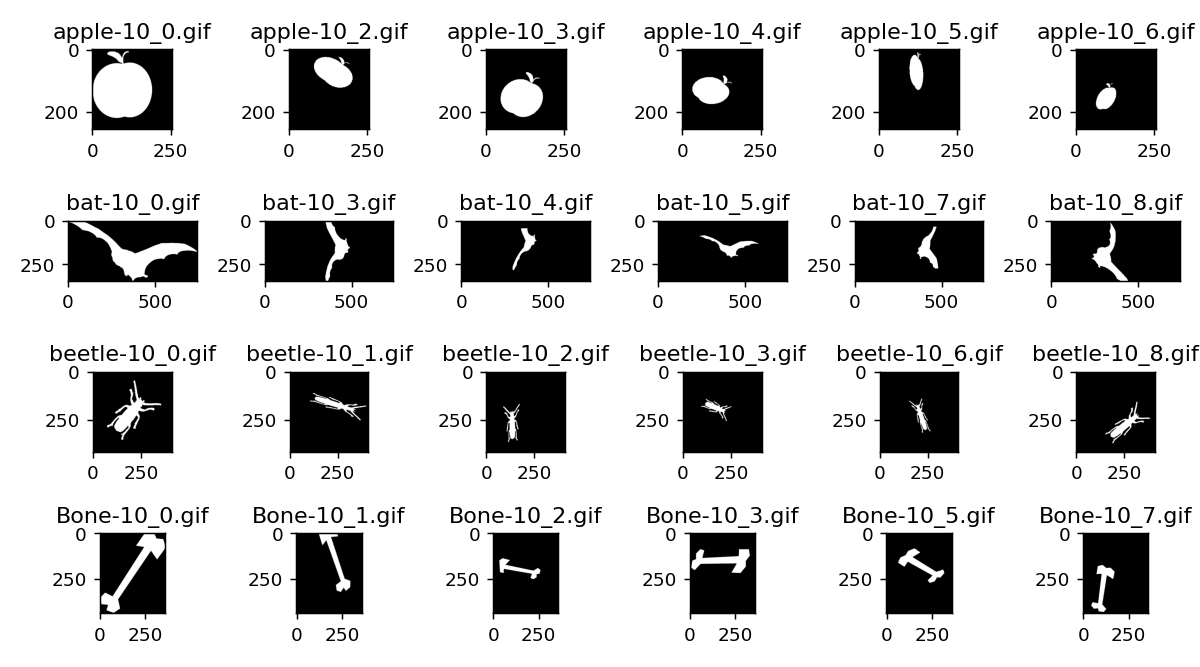

In [8]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label lista é igual a 'i'.
    j = 0;
    count = 0;
    while (count < 6):
        if (label_list_idx[j] == i):
            image_list_temp.append(image_list[j])
            filename_list_temp.append(filename_list[j])
            count += 1
        j += 1
        
fig, ax  = plt.subplots(4, 6, figsize=(9, 5))
for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, vmin=0, vmax=1, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))
    ### ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

## Extraindo características das imagens 

In [9]:
# Arranjo 2D com as caracteristicas das imagens
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
#     print('Imagem {} - classe {}'.format(i, label))
        
    # Aplica o filtro da mediana
    image = filters.median(image, np.ones([3,3]))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Segmenta a imagem
    # --------------------------------------------------
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    # DEBUG
#     print(img_float.shape, img_float.min(), img_float.max())
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float > filters.threshold_otsu(img_float)
    # DEBUG
#     print(img_seg.shape, img_seg.min(), img_seg.max())

    # Devido a inconsistências (ruído, mais de um objeto detectado pelo regionprops) presentes nas imagens 
    # foram realizados os procedimentos a seguir:

    img_seg = morphology.binary_closing(img_seg, morphology.square(3))
    img_seg = morphology.remove_small_holes(img_seg, 300)
    img_seg = morphology.remove_small_objects(img_seg, 300)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    
    # print(len(props))
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
    
    for prop in props:
        
        # Foram realizados testes usando características diferentes, entretanto, as que apresentaram melhores 
        # resultados foram as seguintes:
        
        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [prop.extent,             # Extensão
                        prop.solidity,           # Solidez
                        prop.eccentricity,       # Excentricidade
                       ]
                        
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

# Nomes das caracteristicas computadas
features = ['extent', 'solidity', 'eccentricity']

# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[0.0896 0.3341 0.1612]
[0.8036 0.9711 0.9985]
[0.389  0.6279 0.8001]
[0.1896 0.1959 0.2099]


## Plotando um subconjunto de imagens segmentadas de cada classe

<IPython.core.display.Javascript object>


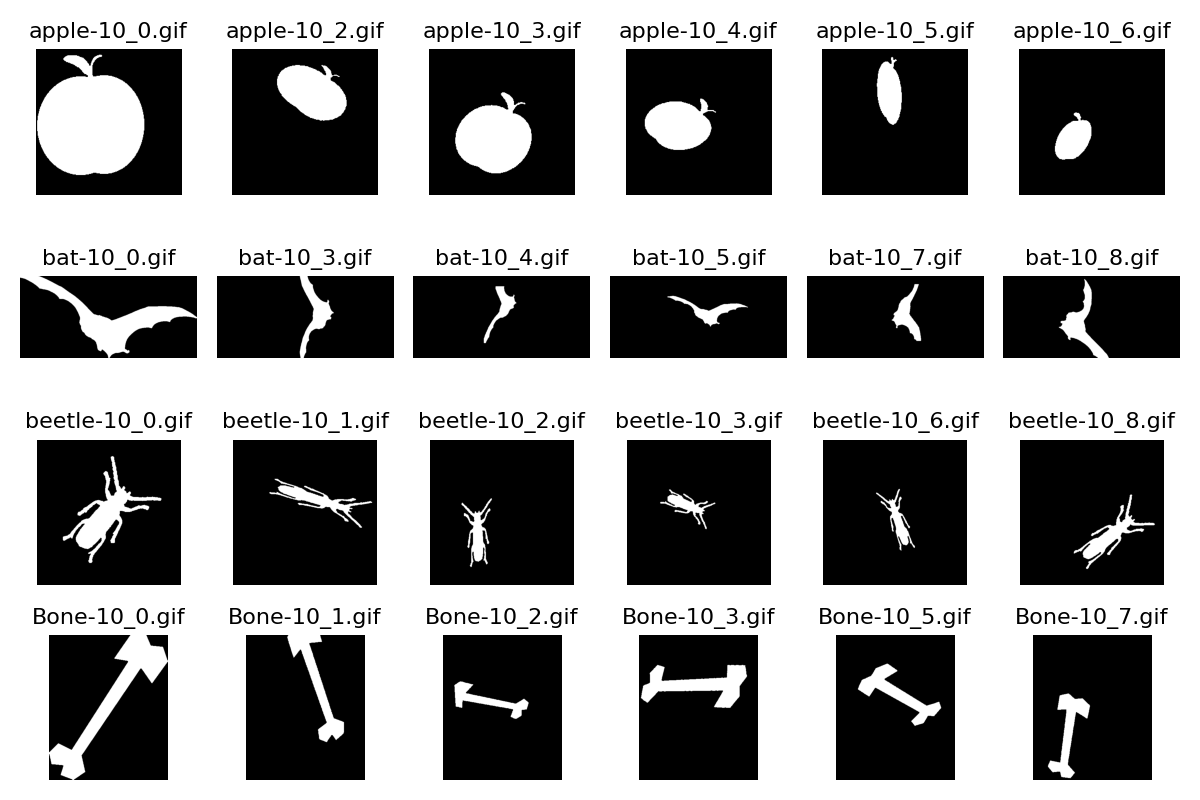

In [10]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label lista é igual a 'i'.
    j = 0;
    count = 0;
    while (count < 6):
        if (label_list_idx[j] == i):
            seg_list_temp.append(seg_list[j])
            filename_list_temp.append(filename_list[j])
            count += 1
        j += 1

fig, ax  = plt.subplots(4, 6, figsize=(9, 6))
for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))
    
    ax[i//6, i%6].axis('off')
    
fig.tight_layout()
plt.show()

## Plotando as caracteristicas computadas

In [11]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = label_list

print(df)

       extent  solidity  eccentricity  class
0    0.707119  0.905423      0.250177  apple
1    0.705085  0.922017      0.776384  apple
2    0.668016  0.902642      0.373700  apple
3    0.693156  0.902442      0.676456  apple
4    0.705691  0.926297      0.926272  apple
..        ...       ...           ...    ...
715  0.192008  0.477871      0.981407   bone
716  0.188377  0.452501      0.978783   bone
717  0.188377  0.452501      0.978783   bone
718  0.178270  0.449541      0.985498   bone
719  0.178270  0.449541      0.985498   bone

[720 rows x 4 columns]


<IPython.core.display.Javascript object>


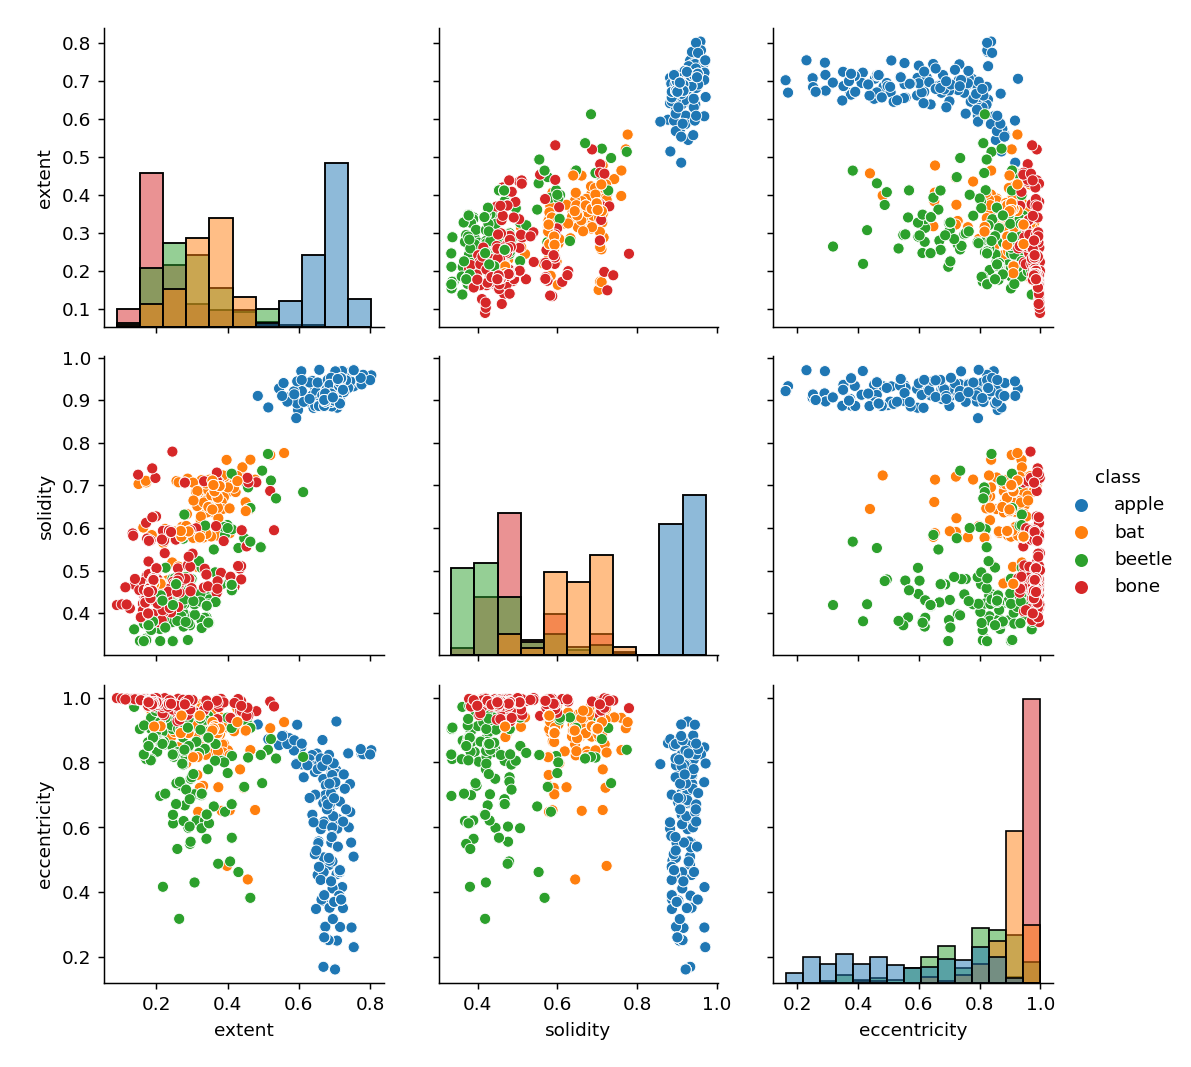

In [12]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Separando o conjunto de dados em subconjuntos de treinamento, validação e testes

In [13]:
# As características selecionadas são salvas na lista 'feature_map_ok'
feature_map_ok = feature_map[:,:]

# Conjunto de treino 1 que será posteriormente separado em conjunto de treino 2 e validação
X_train_1 = feature_map_ok[0:len(image_train_list),:]
y_train_1 = label_train_list_idx

# Conjunto de teste
X_test = feature_map_ok[len(image_train_list):,:]
y_test = label_test_list_idx

# 25% do conjunto de treinamento 1 separado para validação.
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.25, 
                                                                      random_state=393,
                                                                      stratify=y_train_1)

## Normalizando as características

In [14]:
# Normalizamos os dados do conjunto de treino 2, de validação e de testes usando a média e desvio padrão 
# calculados a partir do conjunto de treino 2.

# Transformada Normal de Caracteristicas (Sklearn)
scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')
    
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_2_norm.mean():.4f} ± {X_train_2_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Média:  	 [0.3888 0.6319 0.8282]
Desv. pad.: 	 [0.1856 0.195  0.1753]
Treino: 	 -0.0000 ± 1.0000
Validação: 	 -0.0001 ± 1.0072
Teste:   	 -0.1986 ± 1.2335


## Classificando usando o classificador Suport Vector Machines (SVM)

In [15]:
# Testando os hiperparâmetros manualmente

# Dicionário com as acurácias de treino
acc_train_dict = {}

# Dicionário com as acurácias de validação
acc_val_dict = {}

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_list = [1, 0.1, 0.01, 0.001, 0.0001]
C_list = [0.1, 1, 10, 100, 1000]

for kernel_ in kernel_list:
    acc_train_dict[kernel_] = {}
    acc_val_dict[kernel_] = {}
    for gamma_ in gamma_list:
        acc_train_dict[kernel_][gamma_] = {}
        acc_val_dict[kernel_][gamma_] = {}
        for C_ in C_list:
            # Constrói o classificador SVM
            svm_ = svm.SVC(kernel=kernel_, gamma=gamma_, C=C_)

            # Treinando o classificador
            svm_.fit(X_train_2_norm, y_train_2)

            # Testando o classificador usando o conjunto de validação
            pred = svm_.predict(X_val_norm)
            acc_val = metrics.accuracy_score(y_val, pred)

            acc_val_dict[kernel_][gamma_][C_] = acc_val

            # Testando o classificador usando o conjunto de treino
            # **** Apenas para comparar com o resultado da validação ****
            pred_train = svm_.predict(X_train_2_norm)
            acc_train = metrics.accuracy_score(y_train_2, pred_train)

            acc_train_dict[kernel_][gamma_][C_] = acc_train
   
best_param_val = {"kernel": "", 
                  "gamma": 0, 
                  "C": 0,
                  "acc. val": 0}

print(f'{"kernel":8} \t {"gamma":6} \t {"C":4} \t {"acc. treino":12} \t {"acc. val":8}')
print('-----------------------------------------------------------------------------------------------')
for kernel_ in kernel_list:
    for gamma_ in gamma_list:
        for C_ in C_list:
            if (acc_val_dict[kernel_][gamma_][C_] > best_param_val["acc. val"]):
                best_param_val["kernel"] = kernel_
                best_param_val["gamma"] = gamma_
                best_param_val["C"] = C_
                best_param_val["acc. val"] = acc_val_dict[kernel_][gamma_][C_]
            print(f'{kernel_:8}', 
                  f'\t {gamma_:6}',
                  f'\t {C_:4}',
                  f'\t {acc_train_dict[kernel_][gamma_][C_]:12.4f}',
                  f'\t {acc_val_dict[kernel_][gamma_][C_]:8.4f}')
    
print(f'\nMelhor configuração:')
print(f'kernel = {best_param_val["kernel"]}')
print(f'gamma = {best_param_val["gamma"]}')
print(f'C = {best_param_val["C"]}')
print(f'acc. val: {best_param_val["acc. val"]:.4}')

kernel   	 gamma  	 C    	 acc. treino  	 acc. val
-----------------------------------------------------------------------------------------------
linear   	      1 	  0.1 	       0.8280 	   0.9048
linear   	      1 	    1 	       0.8757 	   0.9365
linear   	      1 	   10 	       0.8810 	   0.9286
linear   	      1 	  100 	       0.8862 	   0.9286
linear   	      1 	 1000 	       0.8862 	   0.9286
linear   	    0.1 	  0.1 	       0.8280 	   0.9048
linear   	    0.1 	    1 	       0.8757 	   0.9365
linear   	    0.1 	   10 	       0.8810 	   0.9286
linear   	    0.1 	  100 	       0.8862 	   0.9286
linear   	    0.1 	 1000 	       0.8862 	   0.9286
linear   	   0.01 	  0.1 	       0.8280 	   0.9048
linear   	   0.01 	    1 	       0.8757 	   0.9365
linear   	   0.01 	   10 	       0.8810 	   0.9286
linear   	   0.01 	  100 	       0.8862 	   0.9286
linear   	   0.01 	 1000 	       0.8862 	   0.9286
linear   	  0.001 	  0.1 	       0.8280 	   0.9048
linear   	  0.001 	    1 	       0.87

In [16]:
# Constrói o classificador SVM usando a melhor configuração encontrada
svm_ = svm.SVC(kernel=best_param_val["kernel"], 
               gamma=best_param_val["gamma"],
               C=best_param_val["C"])

# Treinando o classificador
svm_.fit(X_train_2_norm, y_train_2)

SVC(C=100, gamma=0.01)

In [17]:
# Testando o classificador usando o conjunto de Validação
pred = svm_.predict(X_val_norm)
acc_val = metrics.accuracy_score(y_val, pred)

print(f'Acurácia: {acc_val}')

# Acertos
acertos = y_val == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_val)
print('\nAcerto/Erro:')
print(acertos.astype(int))

print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_val, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_val, pred))

Acurácia: 0.9444444444444444

 Predição:
[1 1 1 0 0 0 2 0 0 3 1 3 0 1 0 0 3 2 1 3 3 1 3 3 2 3 0 3 2 3 3 0 2 0 0 0 3
 1 0 2 2 1 0 0 3 0 0 1 3 1 3 2 2 2 2 2 1 3 1 0 3 2 1 1 0 2 1 1 3 1 3 2 0 2
 3 3 1 2 1 0 0 1 0 3 2 1 0 2 1 1 1 2 0 3 2 2 1 2 3 2 1 3 2 2 3 3 0 3 2 3 1
 3 2 1 3 1 0 2 0 3 2 0 0 2 3 0]

Real:
[1 1 1 0 0 0 2 0 0 3 1 3 0 1 0 0 1 2 1 3 3 1 3 3 2 3 0 2 2 3 1 0 2 0 0 0 3
 1 0 2 2 1 0 0 3 0 0 1 3 1 3 2 2 2 2 2 1 3 1 0 3 2 1 1 0 2 1 1 3 1 3 2 0 2
 3 3 1 2 1 0 0 1 0 3 2 1 0 2 1 1 1 2 0 3 2 2 1 2 3 2 1 3 2 2 3 3 0 3 3 3 1
 2 2 3 3 1 0 2 0 3 2 0 0 3 3 0]

Acerto/Erro:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]

Matriz de confusão:
[[32  0  0  0]
 [ 0 29  0  2]
 [ 0  0 29  2]
 [ 0  1  2 29]]

Relatório de classificação:
              precision    recall  f1-score   support

 

In [18]:
# Testando o classificador usando o conjunto de TESTES
pred = svm_.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)
print(f'Acurácia: {acc_val}')

# Acertos
acertos = y_test == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_test)
print('\nAcerto/Erro:')
print(acertos.astype(int))

print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))

Acurácia: 0.9907407407407407

 Predição:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

Real:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

Acerto/Erro:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1